### Bài 1: Biểu diễn lại bài toán, tính lại đạo hàm loss function với từng biến w.

Với dataset là bộ các $(x_i, y_i)$, $i=1..N$. Trong đó $y_i$ nhận 2 giá trị là 0 hoặc 1

Model $\hat{y}_i = w_0 + w_1 * x_1 + w_2 * x_2$ 

Đưa toàn bộ biểu thức qua hàm $\sigma(x)$ để đưa đầu ra về khoảng $(0, 1)$

Khi đó, $\displaystyle \hat{y}_i = \sigma(w_0 + w_1 * x_1 + w_2 * x_2) = \frac{1}{1 + e^{-(w_0 + w_1 * x_1 + w_2 * x_2)}}$

Do $\hat{y}_i$ nằm trong khoảng từ $(0, 1)$ nên ta có:

$\displaystyle \begin{cases}P(y_i = 1 | x_i, w) = \hat{y}_i \\ P(y_i = 0 | x_i, w) = 1-  \hat{y}_i \end{cases}$

Hay tương đương với $\displaystyle P(y_i|x_i, w) = \hat{y_i}^{y_i} * (1 - \hat{y_i})^{1 - y_i}$

Để cực đại hóa xác suất xảy ra $y_i$ với điều kiện ban đầu là $x_i, w$ thì cần cực tiểu hàm mất mát của datapoint thứ i như sau:
$\displaystyle L_i = - (y_i * log(\hat{y}_i) + (1 - y_i) * log(1 - \hat{y}_i))$

Tiếp theo là phần đạo hàm hàm mất mát

Đặt $\hat{y}_i = \sigma(z)$ với $z = w_0 + w_1 * x_1 + w_2 * x_2$ thì ta có đạo hàm hàm mất mát binary cross-entropy theo từng thành phần tham số như sau:

$\displaystyle \frac{\partial L_i}{\partial w_1} = \frac{\partial L}{\partial \hat{y}_i} * \frac{\partial \hat{y}_i}{\partial z} * \frac{\partial z}{\partial w_1} = - (\frac{y_i}{\hat{y}_i} - \frac{1-y_i}{1 - \hat{y}_i}) * \hat{y}_i(1-\hat{y}_i) * x_1 = (\hat{y}_i - y_i) * x_1$

Tương tự ta cũng có:

$\displaystyle \frac{\partial L_i}{\partial w_0} = \frac{\partial L}{\partial \hat{y}_i} * \frac{\partial \hat{y}_i}{\partial z} * \frac{\partial z}{\partial w_0} = - (\frac{y_i}{\hat{y}_i} - \frac{1-y_i}{1 - \hat{y}_i}) * \hat{y}_i(1-\hat{y}_i) * x_1 = (\hat{y}_i - y_i)$


$\displaystyle \frac{\partial L_i}{\partial w_2} = \frac{\partial L}{\partial \hat{y}_i} * \frac{\partial \hat{y}_i}{\partial z} * \frac{\partial z}{\partial w_2} = - (\frac{y_i}{\hat{y}_i} - \frac{1-y_i}{1 - \hat{y}_i}) * \hat{y}_i(1-\hat{y}_i) * x_2 = (\hat{y}_i - y_i) * x_2$


Tóm lại, ta có:

$\displaystyle \frac{\partial L}{\partial w} = \begin{bmatrix} \frac{\partial L}{\partial w_0}  \\ \frac{\partial L}{\partial w_1} \\ \frac{\partial L}{\partial w_2} \end{bmatrix} = \begin{bmatrix} \sum_{i=1}^N (\hat{y}_i - y_i) \\ \sum_{i=1}^N (\hat{y}_i - y_i) * x_1 \\ \sum_{i=1}^N \hat({y}_i - y_i) * x_2 \end{bmatrix} = \begin{bmatrix} 1 & 1 & ... & 1 \\ x_1^1 & x_1^2 & ... & x_1^N \\ x_2^1 & x_2^2 & ... & x_2^N \end{bmatrix} * \begin{bmatrix} \hat{y}_1 - y_1 \\ \hat{y}_2 - y_2 \\ ... \\ \hat{y}_N - y_N \end{bmatrix} = X^T * (\hat{Y} - Y)$

### Bài 2: Chứng minh hàm sigmoid được tìm ra để cho đạo hàm của loss function với w đẹp nhờ phép tính vi phân


Ta có loss function của Logistic Regression tại điểm dữ liệu thứ i là $\displaystyle L_i = - (y_i * log(\hat{y}_i) + (1 - y_i) * log(1 - \hat{y}_i))$

Đặt $z = w_0 + w_1 * x_1 +  ... + w_N * x_N$. Tính đạo hàm của loss function theo $w_j$ nào đó

$\displaystyle \frac{\partial L_i}{\partial w_j} = \frac{\partial L}{\partial \hat{y}_i} * \frac{\partial \hat{y}_i}{\partial z} * \frac{\partial z}{\partial w_j} = - (\frac{y_i}{\hat{y}_i} - \frac{1-y_i}{1 - \hat{y}_i}) * \frac{\partial \hat{y}_i}{\partial z} * x_j^{(i)} = \frac{(\hat{y}_i - y_i) * x_j^{(i)}}{\hat{y}_i(1 - \hat{y}_i)} * \frac{\partial \hat{y}_i}{\partial z}$

Chú thích: $x_j^{(i)}$ là feature thứ j của sample thứ i

Khi đó, ta cần tìm hàm $\hat{y}_i = f(z)$ sao cho 

$\displaystyle \frac{d\hat{y}_i}{dz} = \hat{y_i}(1 - \hat{y_i})$ 

$\displaystyle \Leftrightarrow \frac{d \hat{y_i}}{\hat{y_i}(1 - \hat{y_i})} = dz$

$\displaystyle \Leftrightarrow \int \frac{d \hat{y_i}}{\hat{y_i}(1 - \hat{y_i})} = \int dz$

$\displaystyle \Leftrightarrow \int \frac{(1 - \hat{y_i} + \hat{y_i})d \hat{y_i}}{\hat{y_i}(1 - \hat{y_i})} = \int dz$

$\displaystyle \Leftrightarrow \int (\frac{1}{\hat{y_i}} + \frac{1}{1 - \hat{y_i}}) d \hat{y_i} = \int dz$

$\displaystyle \Leftrightarrow ln(\vert \frac{\hat{y_i}}{1 - \hat{y_i}} \vert) = z + C$

$\displaystyle \Leftrightarrow \frac{\hat{y_i}}{1 - \hat{y_i}} = e^{z + C}$

$\displaystyle \Leftrightarrow \hat{y_i} = \frac{1}{1 + e^{-(z + C)}}$

Chọn tham số C = 0, ta có hàm sigmoid $\displaystyle \hat{y_i} = \sigma(z) = \frac{1}{1 + e^{-z}}$

### Bài 3: Thử chỉnh learning_rate với code mẫu, vẽ loss function theo epoch để xem độ tăng giảm của loss function.

In [ ]:
%cd '/content/drive/MyDrive/Data/3. Logistic regression'
!ls

/content/drive/.shortcut-targets-by-id/1HIgy7_aoSlAA67JTIc__jUFdvLjQFldJ/Data/3. Logistic regression
 dataset.csv   LogisticRegression.ipynb  'Logistic regression.pdf'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Hàm sigmoid
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [ ]:
# Load data
data = pd.read_csv('dataset.csv').values
N, d = data.shape
x = data[:, 0:-1].reshape(-1, d-1)
y = data[:, -1].reshape(-1, 1)
N, d

(20, 3)

In [ ]:
x_cho_vay = x[y[:,0] == 1]
x_tu_choi = x[y[:,0] == 0]

Text(0, 0.5, 'kinh nghiệm (năm)')

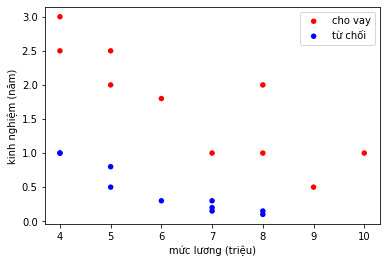

In [ ]:
plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc='best')
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')

In [ ]:
# Logistic Regression
def LogisticRegression(X, y, lr=0.01, nepoches=1000, eps=1e-3, isBreak = True):
  d = X.shape[1]
  w_init = np.random.rand(d, 1)
  # History
  w = [w_init]
  cost_hist = []

  for it in range(nepoches):
    # Predict
    w_old = w[-1]
    y_predict = sigmoid(np.dot(X, w_old))
    cost = - np.sum(np.multiply(y, np.log(y_predict)) + np.multiply(1-y, np.log(1-y_predict)))
    cost_hist.append(cost)
    # gradient descent
    w_new = w_old - lr * np.dot(X.T, y_predict - y)
    if isBreak and np.linalg.norm(w_new - w_old) / d < eps:
      break

    w.append(w_new)

  return w, cost_hist

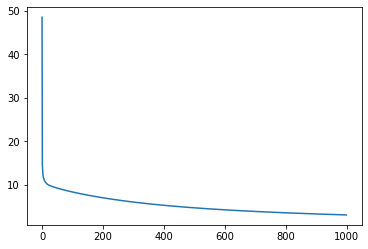

In [ ]:
# Thêm cột 1 vào X
Xbar = np.hstack((np.ones((N, 1)), x))

# Chạy thuật toán
w_hist, cost_hist = LogisticRegression(Xbar, y, lr=0.01, nepoches=1000, isBreak = False)
w = w_hist[-1]
plt.plot(cost_hist)

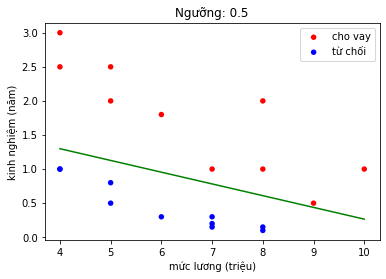

In [ ]:
# Vẽ đường phân cách với ngưỡng là 0.5
t = 0.5

plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.title('Ngưỡng: 0.5')
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')
plt.plot((4, 10),(-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.show()

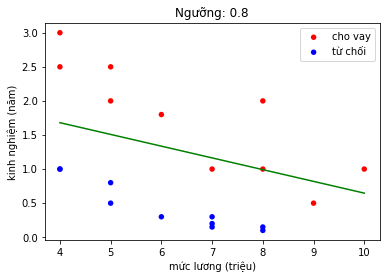

In [ ]:
# Vẽ đường phân cách với ngưỡng là 0.8
t = 0.8

plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.title('Ngưỡng: 0.8')
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')
plt.plot((4, 10),(-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.show()

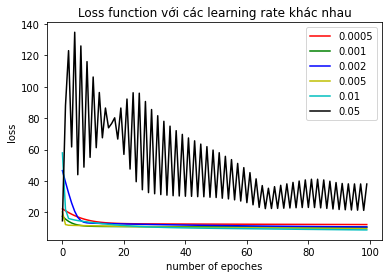

In [ ]:
# Thay đổi learning rate và quan sát sự thay đổi của loss
epoches = 100
lr_list = [0.0005, 0.001, 0.002, 0.005, 0.01, 0.05]
color_list = ['r', 'g', 'b', 'y', 'c', 'k']

for i, lr in enumerate(lr_list):
  w_hist, cost_hist = LogisticRegression(Xbar, y, lr, epoches, eps = 0)
  plt.plot(cost_hist, color_list[i])

plt.title('Loss function với các learning rate khác nhau')
plt.xlabel('number of epoches')
plt.ylabel('loss')
plt.legend(lr_list)
plt.show()

### Bài 4: Thử giải bài toán XOR bằng logistic regression (chạy code thật) Giải thích tại sao lại không tìm được? Trong model đổi hàm linear trong sigmoid bằng hàm non-linear để giải bài toán XOR (parabol, ellipse, (x-a)/(x-b)

In [ ]:
# Đầu vào
x_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0]).reshape(-1, 1)
N_xor = x_xor.shape[0]

In [ ]:
Xbar_xor = np.concatenate((np.ones((N_xor, 1)), x_xor), axis = 1)
Xbar_xor

array([[1., 0., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 1.]])

array([[-0.09855463],
       [ 0.13349481],
       [ 0.20346969]])

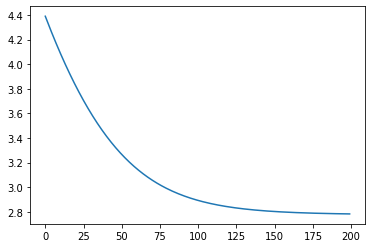

In [ ]:
# Chạy thuật toán Logistic Regression với hàm tuyến tính
nepoches = 200
lr = 0.01
w_hist, cost_hist = LogisticRegression(Xbar_xor, y_xor, lr, nepoches, isBreak = False)
w = w_hist[-1]
plt.plot(cost_hist)
w

In [ ]:
x_xor_0 = x_xor[y_xor.reshape(-1) == 0]
x_xor_1 = x_xor[y_xor.reshape(-1) == 1]

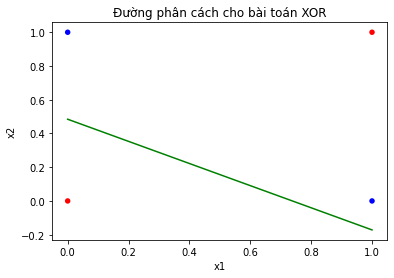

In [ ]:
plt.scatter(x_xor_0[:, 0], x_xor_0[:, 1], c='red', edgecolors='none', s=30, label='0')
plt.scatter(x_xor_1[:, 0], x_xor_1[:, 1], c='blue', edgecolors='none', s=30, label='1')
plt.title('Đường phân cách cho bài toán XOR')
plt.xlabel('x1')
plt.ylabel('x2')

# Đường thẳng w0 + w1x1 + w2x2 = 0 -> x2 = -(w0 + w1x1)/w2
x1 = np.array([0, 1])
x2 = x1 * (-w[1]/w[2]) - w[0]/w[2]

plt.plot(x1, x2, 'g')
plt.show()

**Nhận xét:** Do tập dữ liệu không tách biệt tuyến tính nên không thể tìm được đường thẳng để tách tập dữ liệu thành 2 tập riêng biệt. Để giải quyết được bài toán này, ta cần thay đường thẳng bằng một đường cong với phương trình phức tạp hơn.

Thay đường $w_0 + w_1 x_1 + w_2 x_2 = 0$ bằng đường $\displaystyle x_2 = a * \frac{x_1 - b}{x_1 - c}$ tương đương với $\displaystyle x_1 x_2 - ax_1 - cx_2 + ab = 0$

Đặt $x_3 = x_1 x_2$ đưa về phương trình tuyến tính $w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3 = 0$

In [ ]:
# Đầu vào
Xbar_nonlinear = np.concatenate((Xbar_xor, (Xbar_xor[:,1] * Xbar_xor[:,2]).reshape(-1, 1)), axis = 1)
Xbar_nonlinear

array([[1., 0., 0., 0.],
       [1., 0., 1., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 1.]])

array([[-0.20131008],
       [ 1.04238913],
       [ 0.97190036],
       [-3.12841412]])

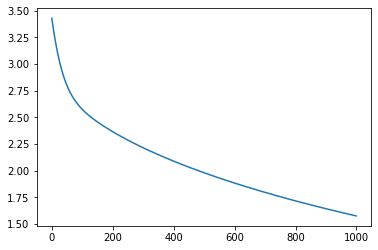

In [ ]:
# Chạy thuật toán LogisticRegression với bộ dữ liệu mới
nepoches = 1000
lr = 0.01
w_hist, cost_hist = LogisticRegression(Xbar_nonlinear, y_xor, lr, nepoches, isBreak = False)
w = w_hist[-1]
plt.plot(cost_hist)
w

Phương trình $w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3 = 0$

$\displaystyle \Leftrightarrow w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 = 0$

$\displaystyle \Leftrightarrow x_2 = \frac{-w_0-w_1 x_1}{w_2 + w_3 x_1}$

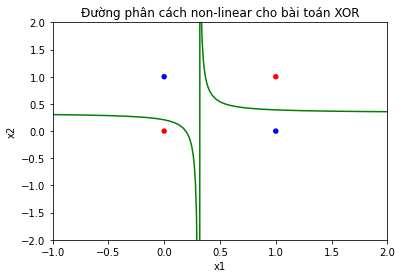

In [ ]:
# Vẽ đường phân cách
plt.scatter(x_xor_0[:, 0], x_xor_0[:, 1], c='red', edgecolors='none', s=30, label='0')
plt.scatter(x_xor_1[:, 0], x_xor_1[:, 1], c='blue', edgecolors='none', s=30, label='1')
plt.title('Đường phân cách non-linear cho bài toán XOR')
plt.xlabel('x1')
plt.ylabel('x2')

# Đường thẳng w0 + w1x1 + w2x2 = 0 -> x2 = -(w0 + w1x1)/w2
x1 = np.arange(-1, 2, 0.01)
x2 = (-w[0] - w[1] * x1) / (w[2] + w[3] * x1)
plt.axis([-1, 2, -2, 2])
plt.plot(x1, x2, 'g')
plt.show()

Ngoài dạng phân thức thì còn có dạng parabol và ellipse là có thể sử dụng được.

Với dạng parabol thì $\displaystyle x_2 = ax_1^2 + bx_1 + c \Leftrightarrow c + bx_1 - x_2 + ax_1^2 = 0$

Do đó, nếu đặt $x_3 = x_1^2$ thì ta có thể đưa về dạng tuyến tính như sau
$w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3 = 0$

In [ ]:
# Đầu vào
Xbar_parabol = np.concatenate((Xbar_xor, (Xbar_xor[:, 1] * Xbar_xor[:, 1]).reshape(-1, 1)), axis = 1)
Xbar_parabol

array([[1., 0., 0., 0.],
       [1., 0., 1., 0.],
       [1., 1., 0., 1.],
       [1., 1., 1., 1.]])

array([[ 0.02737021],
       [-0.29092424],
       [-0.02966215],
       [ 0.27548291]])

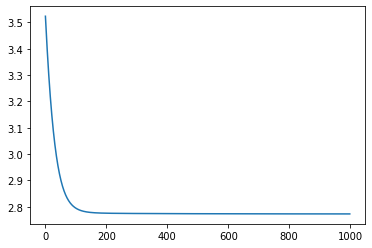

In [ ]:
# Chạy thuật toán LogisticRegression với bộ dữ liệu mới
nepoches = 1000
lr = 0.01
w_hist, cost_hist = LogisticRegression(Xbar_parabol, y_xor, lr, nepoches, isBreak = False)
w = w_hist[-1]
plt.plot(cost_hist)
w

Phương trình $\displaystyle w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3 = 0 \Leftrightarrow w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1^2 = 0$
$\displaystyle \Leftrightarrow x_2 = \frac{-w_0}{w_2} + \frac{-w_1 x_1}{w_2} + \frac{-w_3 x_1^2}{w_2}$

Do đó, ta có đường phân cách như sau:

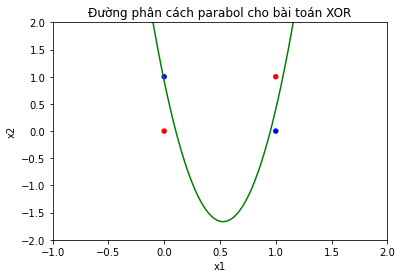

In [ ]:
# Vẽ đường phân cách
plt.scatter(x_xor_0[:, 0], x_xor_0[:, 1], c='red', edgecolors='none', s=30, label='0')
plt.scatter(x_xor_1[:, 0], x_xor_1[:, 1], c='blue', edgecolors='none', s=30, label='1')
plt.title('Đường phân cách parabol cho bài toán XOR')
plt.xlabel('x1')
plt.ylabel('x2')

# Đường thẳng w0 + w1x1 + w2x2 = 0 -> x2 = -(w0 + w1x1)/w2
x1 = np.arange(-1, 2, 0.01)
x2 = -w[0]/w[2] - w[1] * x1 / w[2] - w[3] * x1 * x1 / w[2]
plt.axis([-1, 2, -2, 2])
plt.plot(x1, x2, 'g')
plt.show()

### Bài 5: Học, hiểu và replicate lại tutorial này (logistic regression dùng thư viện cũng như các bước để xử lý dữ liệu)

In [ ]:
# Chuyển đến thư mục chứa file dữ liệu
%cd '/content/drive/MyDrive/The Anh Tran/HW2'
!ls

/content/drive/.shortcut-targets-by-id/1iTl5EvhAkwEQhbz8P_bIGaNXAYESafQ8/The Anh Tran/HW2
diabetes.csv  Homework2.ipynb


In [ ]:
# Load data
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('diabetes.csv', header=0, names = col_names)
pima

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# split dataset
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols].values
y = pima.label.values

In [ ]:
# split data, 75% for training and 25% for testing
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression

# train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
# evaluation
from sklearn import metrics

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
conf_matrix

array([[118,  12],
       [ 26,  36]])

In [ ]:
%matplotlib inline

In [ ]:
# visulize confusion matrix
import seaborn as sns

Text(0.5, 257.44, 'Predicted label')

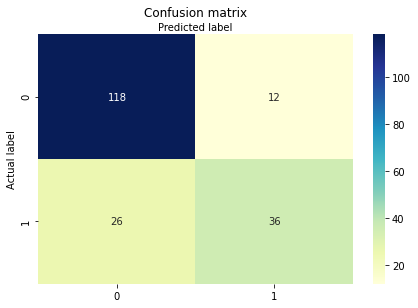

In [ ]:
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel("Actual label")
plt.xlabel('Predicted label')

In [ ]:
# Score
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Precision: ', metrics.precision_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred))

Accuracy:  0.8020833333333334
Precision:  0.75
Recall:  0.5806451612903226


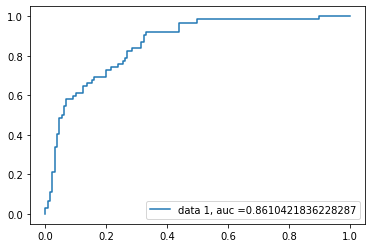

In [ ]:
# ROC Curve
y_pred_proba = model.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='data 1, auc ='+str(auc))
plt.legend(loc=4)
plt.show()

### Bài 6: Chứng minh: binary crossentropy loss là hàm lồi, còn mean squared error không phải hàm lồi

Trước tiên, với binary crossentropy loss có phương trình như sau (Xét trên một điểm dữ liệu i để thuận tiện tính toán)

$\displaystyle L_i = - (y_i * log(\hat{y}_i) + (1 - y_i) * log(1 - \hat{y}_i))$

$\displaystyle \Leftrightarrow L_i = - (y_i * log(x_i w) + (1 - y_i) * log(1 - x_i w))$

Xét feature thứ j bất kỳ của sample thứ i là $x_j^{(i)}$. Lấy đạo hàm riêng của $L_i$ theo feature đó. 

Đặt $z = w_0 + w_1 x_1 + ... + w_N x_N$, ta có

$\displaystyle \frac{\partial L_i}{\partial x_j^{(i)}} = \frac{\partial L}{\partial \hat{y}_i} * \frac{\partial \hat{y}_i}{\partial z} * \frac{\partial z}{\partial x_j^{(i)}} = - (\frac{y_i}{\hat{y}_i} - \frac{1-y_i}{1 - \hat{y}_i}) * \hat{y}_i(1-\hat{y}_i) * w_j = (\hat{y}_i - y_i) * w_j$

Tiếp tục đạo hàm $L_i$ theo $x_j^{(i)}$, ta có:
$\displaystyle \frac{\partial}{\partial x_j^{(i)}} (\frac{\partial L_i}{\partial x_j^{(i)}})= \frac{\partial}{\partial x_j^{(i)}}((\hat{y}_i - y_i) * w_j) = w_j^2 * \hat{y_i}(1 - \hat{y_i}) > 0$

Ta thấy rằng đạo hàm riêng bậc 2 của $L_i$ theo mọi feature  $x_j^{(i)} \forall j$ đều lớn hơn 0. 

**Kết luận: hàm binary crossentropy loss là hàm lồi.**



Tiếp theo, với MSE, ta có hàm loss của điểm dữ liệu thứ i

$\displaystyle L_i = (\hat{y}_i - y_i)^2$

Khi đó, $\displaystyle \frac{\partial L_i}{\partial x_j^{(i)}} = \frac{\partial L}{\partial \hat{y}_i} * \frac{\partial \hat{y}_i}{\partial z} * \frac{\partial z}{\partial x_j^{(i)}} = 2(\hat{y}_i - y_i) * \hat{y}_i(1-\hat{y}_i) * w_j = 2w_j(-\hat{y_i}^3 + (y_i + 1)\hat{y_i}^2 - y_i\hat{y_i})$

Đạo hàm bậc 2: $\displaystyle \frac{\partial^2 L_i}{(\partial x_j^{(i)})^2} = \frac{\partial}{\partial x_j^{(i)}} (\frac{\partial L_i}{\partial x_j^{(i)}})= \frac{\partial}{\partial x_j^{(i)}}(2w_j(-\hat{y_i}^3 + (y_i + 1)\hat{y_i}^2 - y_i\hat{y_i})) $

$\displaystyle =  \frac{\partial }{\partial \hat{y}_i} ((2w_j(-\hat{y_i}^3 + (y_i + 1)\hat{y_i}^2 - y_i\hat{y_i}))) * \frac{\partial \hat{y}_i}{\partial z} * \frac{\partial z}{\partial x_j^{(i)}} $

$\displaystyle = 2w_j(-3\hat{y_i}^2 + 2(y_i + 1)\hat{y_i} - y_i) * \hat{y}_i(1-\hat{y}_i) * w_j$

$\displaystyle = 2w_j^2 * \hat{y}_i(1-\hat{y}_i) * (-3\hat{y_i}^2 + 2(y_i + 1)\hat{y_i} - y_i)$


**Nhận xét:** Trong đạo hàm bậc 2 của MSE cho $x_j^{(i)}$, có thành phần $2w_j^2 * \hat{y}_i(1-\hat{y}_i)$ là luôn lớn hơn 0. Vì vậy, để xét dấu của biểu thức trên, ta xét dấu hàm số $f(\hat{y_i}) = -3\hat{y_i}^2 + 2(y_i + 1)\hat{y_i} - y_i$ với $\hat{y_i} \in (0, 1)$ và $y_i = 0..1$

Để thuận tiện cho việc xét dấu, ta sẽ vẽ đồ thị theo biến $\hat{y_i}$ và coi $y_i$ là tham số

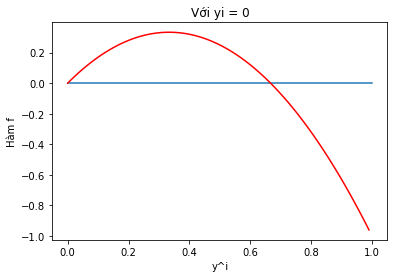

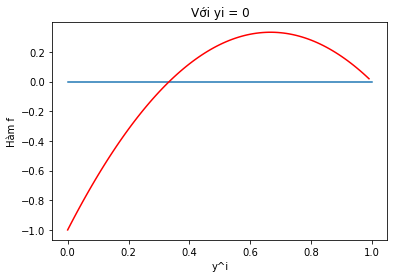

In [ ]:
# Với yi = 0 thì hàm số tương đương với f = -3x^2 + 2x và x thuộc khoảng (0, 1)
x = np.arange(0, 1, 0.01)
y_0 = -3 * x * x + 2 * x
plt.title('Với yi = 0')
plt.xlabel('y^i')
plt.ylabel('Hàm f')
plt.plot([0, 1], [0, 0])
plt.plot(x, y_0, 'r')
plt.show()

# Với yi = 1 thì hàm số tương đương với f = -3x^2 + 4x - 1 và x thuộc khoảng (0, 1)
y_1 = -3 * x * x + 4 * x - 1
plt.title('Với yi = 0')
plt.xlabel('y^i')
plt.ylabel('Hàm f')
plt.plot([0, 1], [0, 0])
plt.plot(x, y_1, 'r')
plt.show()

Từ đồ thị của hàm f trong khoảng (0, 1), ta thấy là hàm f không luôn dương với mọi $\hat{y_i}$. Do đó, $\displaystyle\frac{\partial^2 L_i}{(\partial x_i^{(j)})^2}$ không luôn dương $\forall x_j^{(i)}$.

**Kết luận: Hàm MSE loss không phải là hàm lồi.**